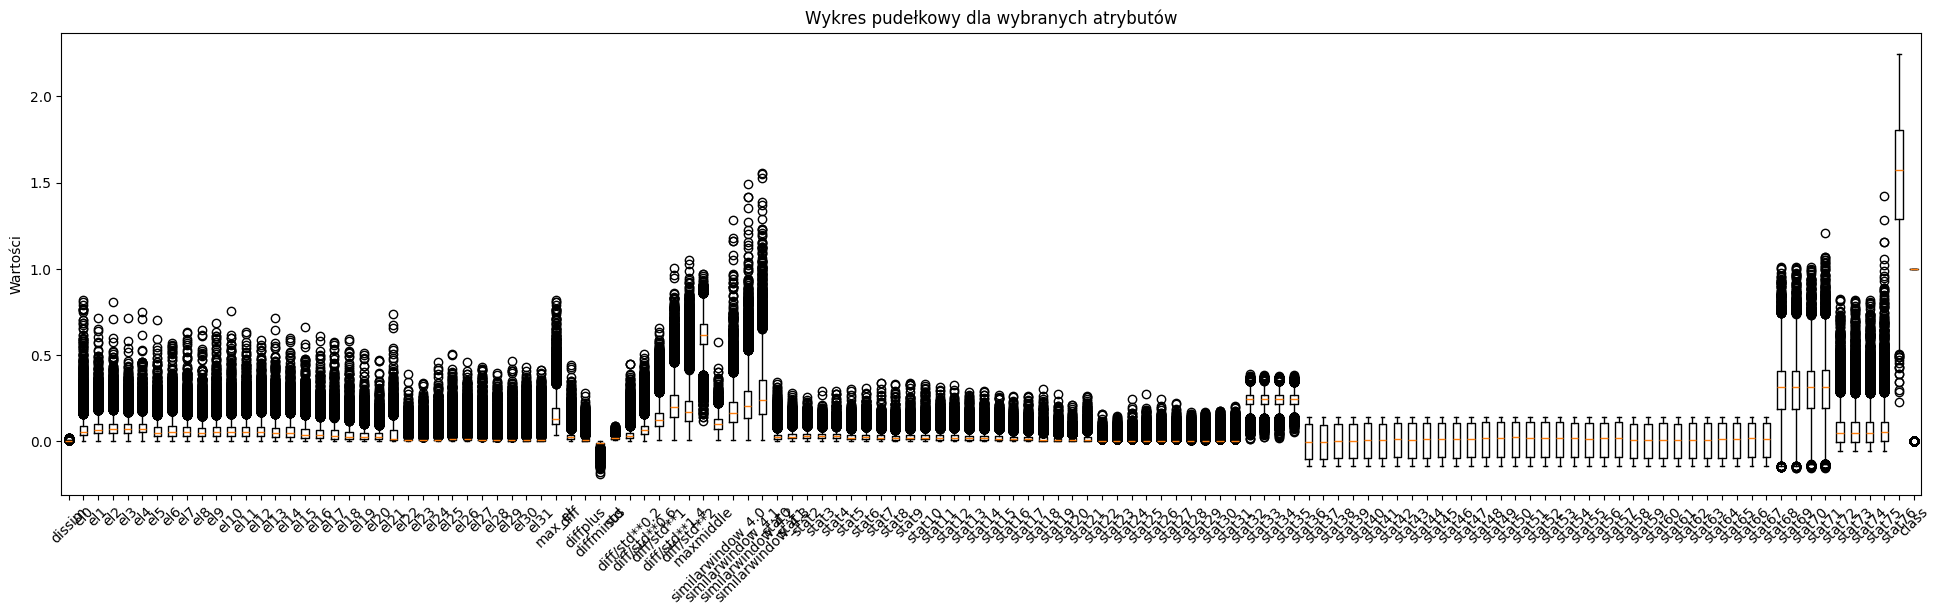

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Załaduj dane
# Zakładam, że Twój plik danych jest w formacie CSV
data_path = '147963-imbalanced.txt'
data = pd.read_csv(data_path, delimiter='\t')  # Używamy separatora tabulatora

# Wybieramy kilka atrybutów do wizualizacji, np. pierwsze 10 kolumn
selected_columns = data.columns  # Możesz wybrać inne kolumny, które są dla Ciebie interesujące
selected_data = data[selected_columns]

# Tworzenie wykresu pudełkowego
plt.figure(figsize=(24, 6))  # Ustawienie rozmiaru figury
plt.boxplot(selected_data.values, labels=selected_data.columns)
plt.xticks(rotation=45)  # Obrócenie etykiet dla lepszej czytelności
plt.title('Wykres pudełkowy dla wybranych atrybutów')
plt.ylabel('Wartości')
plt.show()

In [14]:
# Zakładamy, że ostatnia kolumna to 'class' z etykietami klas
class_counts = data.iloc[:, -1].value_counts()

# Wyświetlenie liczby przypadków dla każdej klasy
print(class_counts)

class
1    9705
0     295
Name: count, dtype: int64


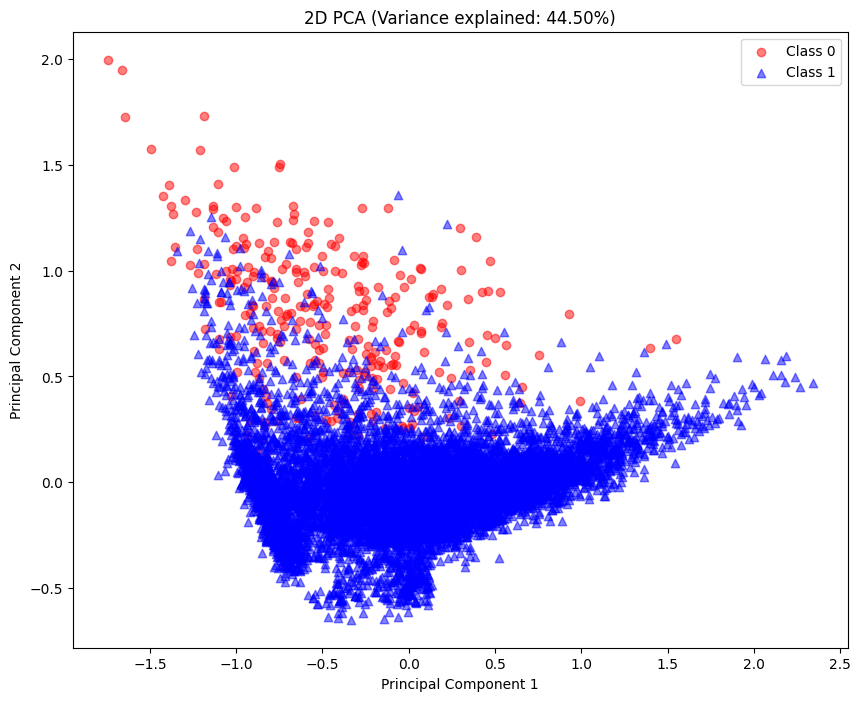

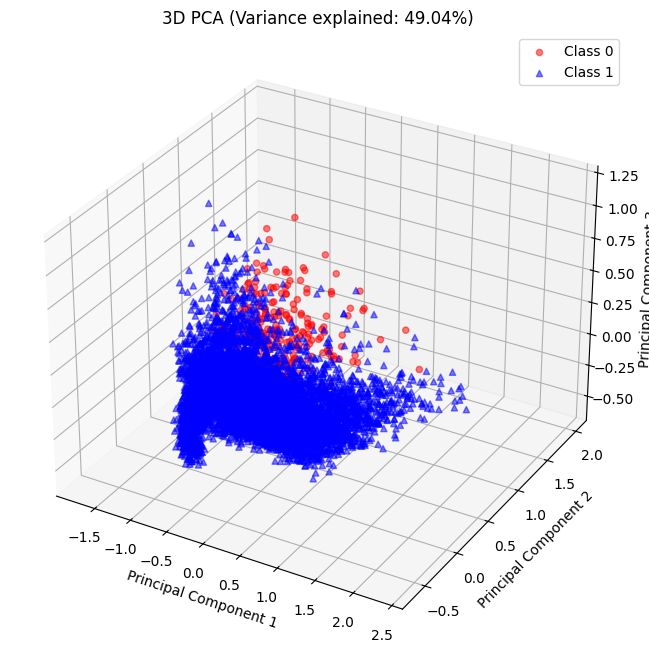

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Dla wizualizacji 3D

# Załaduj dane
X = data.iloc[:, :-1]  # atrybuty
y = data.iloc[:, -1]   # etykiety klas

# PCA do 2D
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
variance_2d = sum(pca_2d.explained_variance_ratio_)

# PCA do 3D
pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X)
variance_3d = sum(pca_3d.explained_variance_ratio_)

# Wizualizacja 2D
plt.figure(figsize=(10, 8))
for class_value, marker, color in zip([0, 1], ['o', '^'], ['red', 'blue']):
    plt.scatter(X_2d[y == class_value, 0], X_2d[y == class_value, 1], alpha=0.5, c=color, marker=marker, label=f'Class {class_value}')
plt.title(f'2D PCA (Variance explained: {variance_2d:.2%})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Wizualizacja 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for class_value, marker, color in zip([0, 1], ['o', '^'], ['red', 'blue']):
    ax.scatter(X_3d[y == class_value, 0], X_3d[y == class_value, 1], X_3d[y == class_value, 2], alpha=0.5, c=color, marker=marker, label=f'Class {class_value}')
plt.title(f'3D PCA (Variance explained: {variance_3d:.2%})')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend()
plt.show()


In [26]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Definicja klasyfikatorów
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'Gaussian NB': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# Definicja technik przeciwdziałania niezbalansowaniu klas
resamplers = {
    'Random Under Sampler': RandomUnderSampler(),
    'SMOTE': SMOTE()
}

# Definicja metryk
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'G-mean': make_scorer(geometric_mean_score),
    'ROC AUC': make_scorer(roc_auc_score)
}

# Przygotowanie danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Eksperymentowanie
results = {}
for clf_name, clf in classifiers.items():
    for resampler_name, resampler in resamplers.items():
        pipeline = make_pipeline(resampler, clf)
        cv_results = cross_validate(pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=10), scoring=scoring)
        for metric, scores in cv_results.items():
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            results[(clf_name, resampler_name, metric)] = (mean_score, std_score)

# Wyświetlanie wyników
plt.figure(figsize=(12, 8))
for clf_name in classifiers.keys():
    for metric in scoring.keys():
        mean_scores = [results[(clf_name, resampler_name, metric)][0] for resampler_name in resamplers.keys()]
        std_scores = [results[(clf_name, resampler_name, metric)][1] for resampler_name in resamplers.keys()]
        plt.errorbar(list(resamplers.keys()), mean_scores, yerr=std_scores, label=f'{clf_name} ({metric})')

plt.title('Comparison of Classifier Performance with Different Resampling Techniques')
plt.xlabel('Resampling Technique')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



KeyboardInterrupt: 